In [2]:
# Импортируйте библиотеку pandas
import pandas as pd
# Импортируйте библиотеку matplotlib.pyplot
import matplotlib.pyplot as plt
# Импортируйте библиотеку numpy
import numpy as np
# Прочитайте файл и сохраните его в любой переменной
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive
df = pd.read_csv('/content/drive/MyDrive/Airpollution.csv')

ModuleNotFoundError: No module named 'pandas'

In [3]:
# Вывести на экран первые 10 строк таблицы
df.head(10)

NameError: name 'df' is not defined

In [ ]:
# Выведите данные о таблице
df.info()
# Выведите типы данных
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


,0
Country,object
City,object
AQI Value,int64
AQI Category,object
CO AQI Value,int64
CO AQI Category,object
Ozone AQI Value,int64
Ozone AQI Category,object
NO2 AQI Value,int64
NO2 AQI Category,object


In [ ]:
# Выведите количество строк и колонок
print(df.shape)
# Выведите название колонок
print(df.columns.tolist())

(23463, 12)
['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category']


In [ ]:
# Выведите наличие пустых значений, вывести количество по каждой колонке
print(df.isna().sum())

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


In [ ]:
# Проверка на наличие дубликатов
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")
# Удаление дубликатов, если они есть
if duplicates > 0:
    df = df.drop_duplicates()
    print("Дубликаты удалены.")
else:
    print("Дубликаты отсутствуют.")

Количество дубликатов: 0
Дубликаты отсутствуют.


In [ ]:
 # Определяем количество колонок каждого типа данных
print("\nТипы данных в датасете:")
print(df.dtypes.value_counts())
# Проверка наличия пропущенных значений по каждой колонке
missing_values = df.isna().sum()
# Выводим только колонки с пропущенными значениями
missing_columns = missing_values[missing_values > 0]
print("\nКолонки с пропущенными значениями и их количество:")
print(missing_columns)


Типы данных в датасете:
object    7
int64     5
Name: count, dtype: int64

Колонки с пропущенными значениями и их количество:
Country    427
City         1
dtype: int64


Доминирует тип object.    Пропущенные значения присутствуют. County 427. city 1

<Axes: >

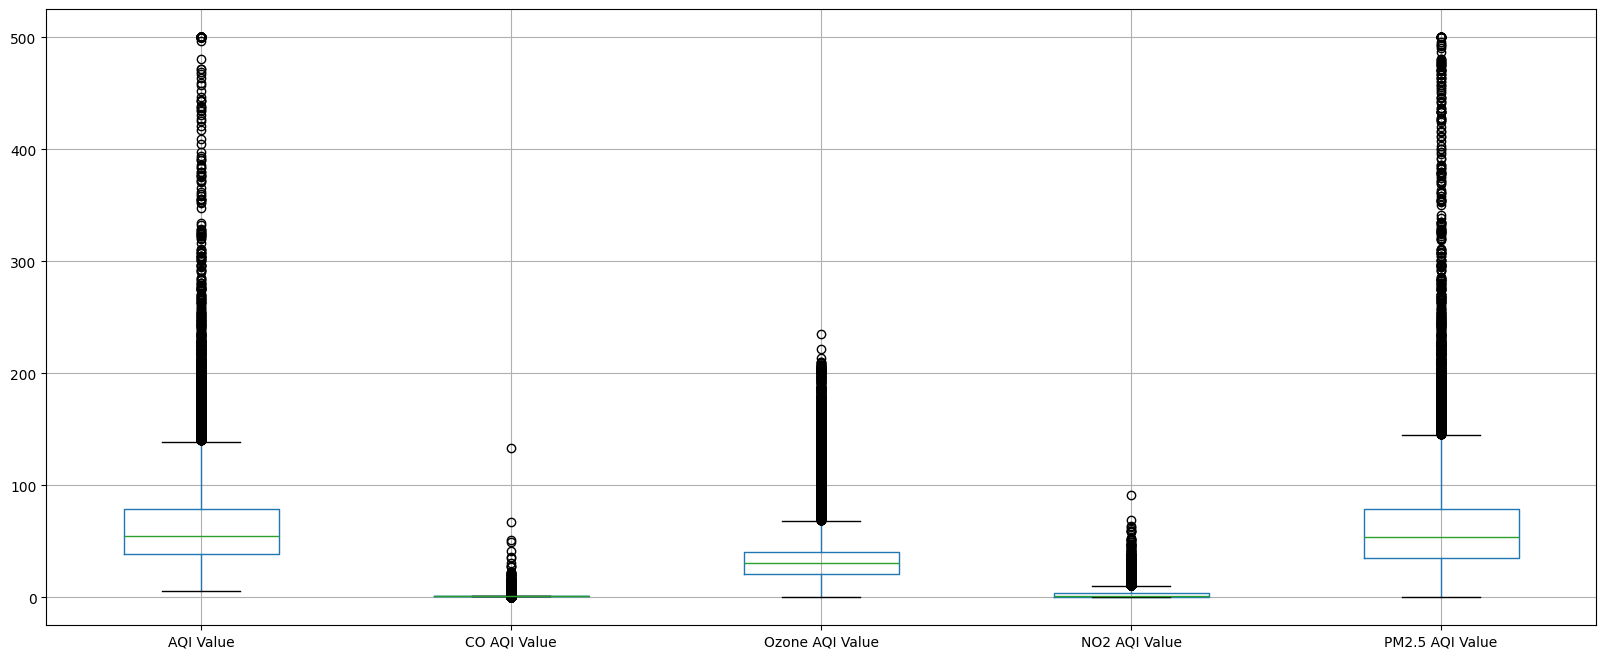

In [ ]:
#Постройте диаграмму размаха для переменной data, подберите оптимальные параметры figsize. Наблюдаете ли Вы какие-то аномалии?
df.boxplot(figsize=(20,8))

Наблюдаю большое количество точек аномалии

In [ ]:
# Строим гистограмму для переменной 'data'
df.hist(figsize=(20,10), bins=100 )

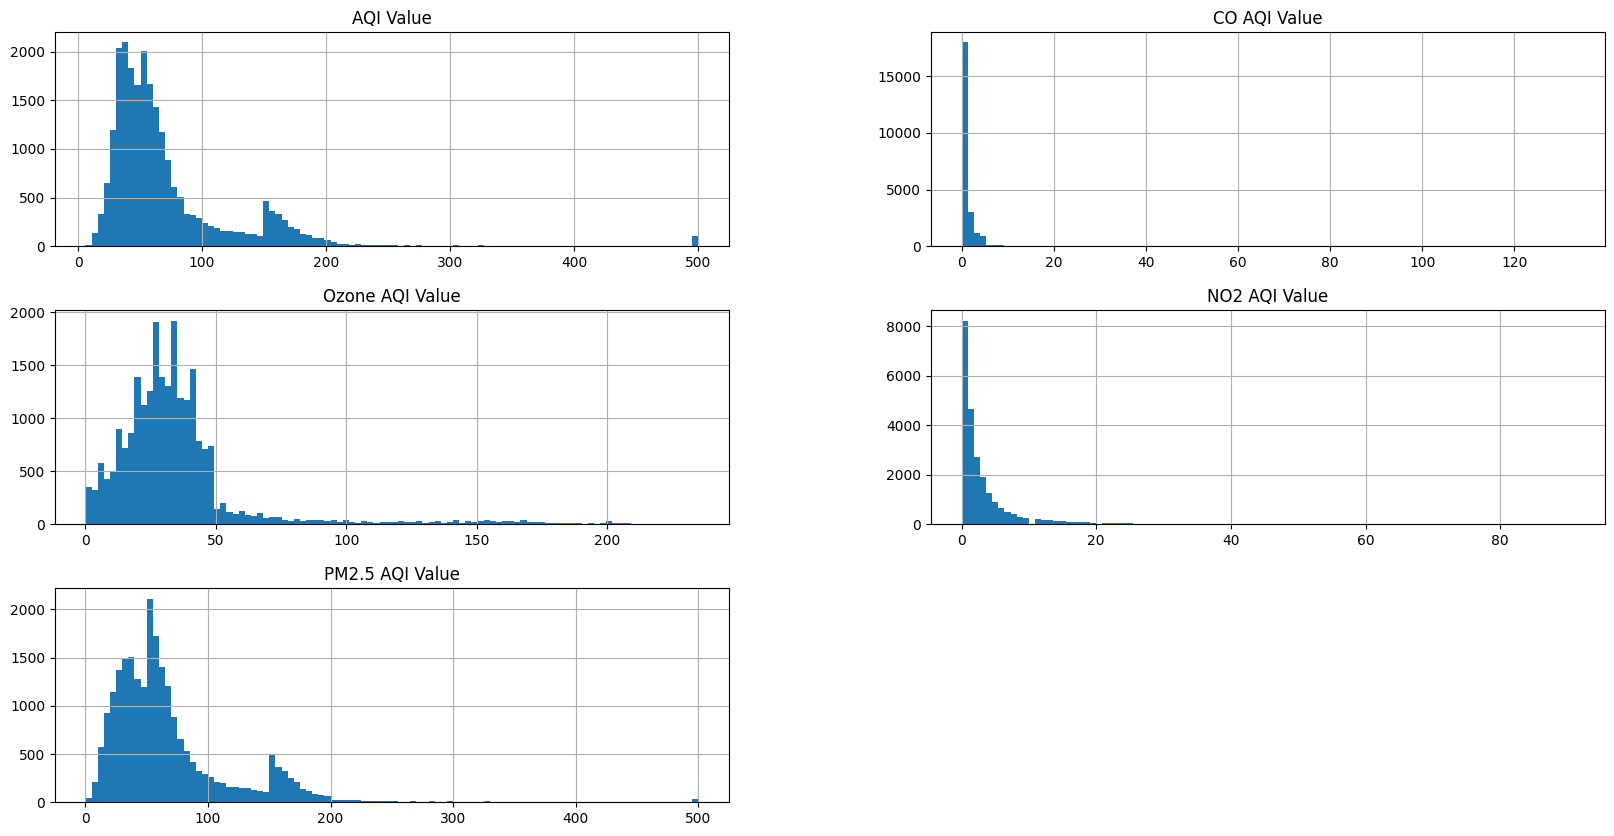

In [ ]:
# Вывести гистограмму для переменной 'data' с помощью plt.show
df.hist(figsize=(20,10), bins=100 )
plt.show()

In [ ]:
# Выбрать все данные которые относятся к числовым
df.select_dtypes(exclude = 'object')

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,51,1,36,0,51
1,41,1,5,1,41
2,66,1,39,2,66
3,34,1,34,0,20
4,22,0,22,0,6
...,...,...,...,...,...
23458,184,3,154,2,184
23459,50,1,20,5,50
23460,50,1,22,1,50
23461,71,1,44,2,71


In [ ]:
# Логарифмируем числовые данные, добавляя единицу
df_log = df.select_dtypes(exclude='object')
for value in df_log:
  df_log[value] = df_log[value].apply(lambda x: np.log(x+1))

       AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
0       3.951244             1               36              0   
1       3.737670             1                5              1   
2       4.204693             1               39              2   
3       3.555348             1               34              0   
4       3.135494             0               22              0   
...          ...           ...              ...            ...   
23458   5.220356             3              154              2   
23459   3.931826             1               20              5   
23460   3.931826             1               22              1   
23461   4.276666             1               44              2   
23462   4.262680             1               38              0   

       PM2.5 AQI Value  
0                   51  
1                   41  
2                   66  
3                   20  
4                    6  
...                ...  
23458              184  
23459  

<Axes: >

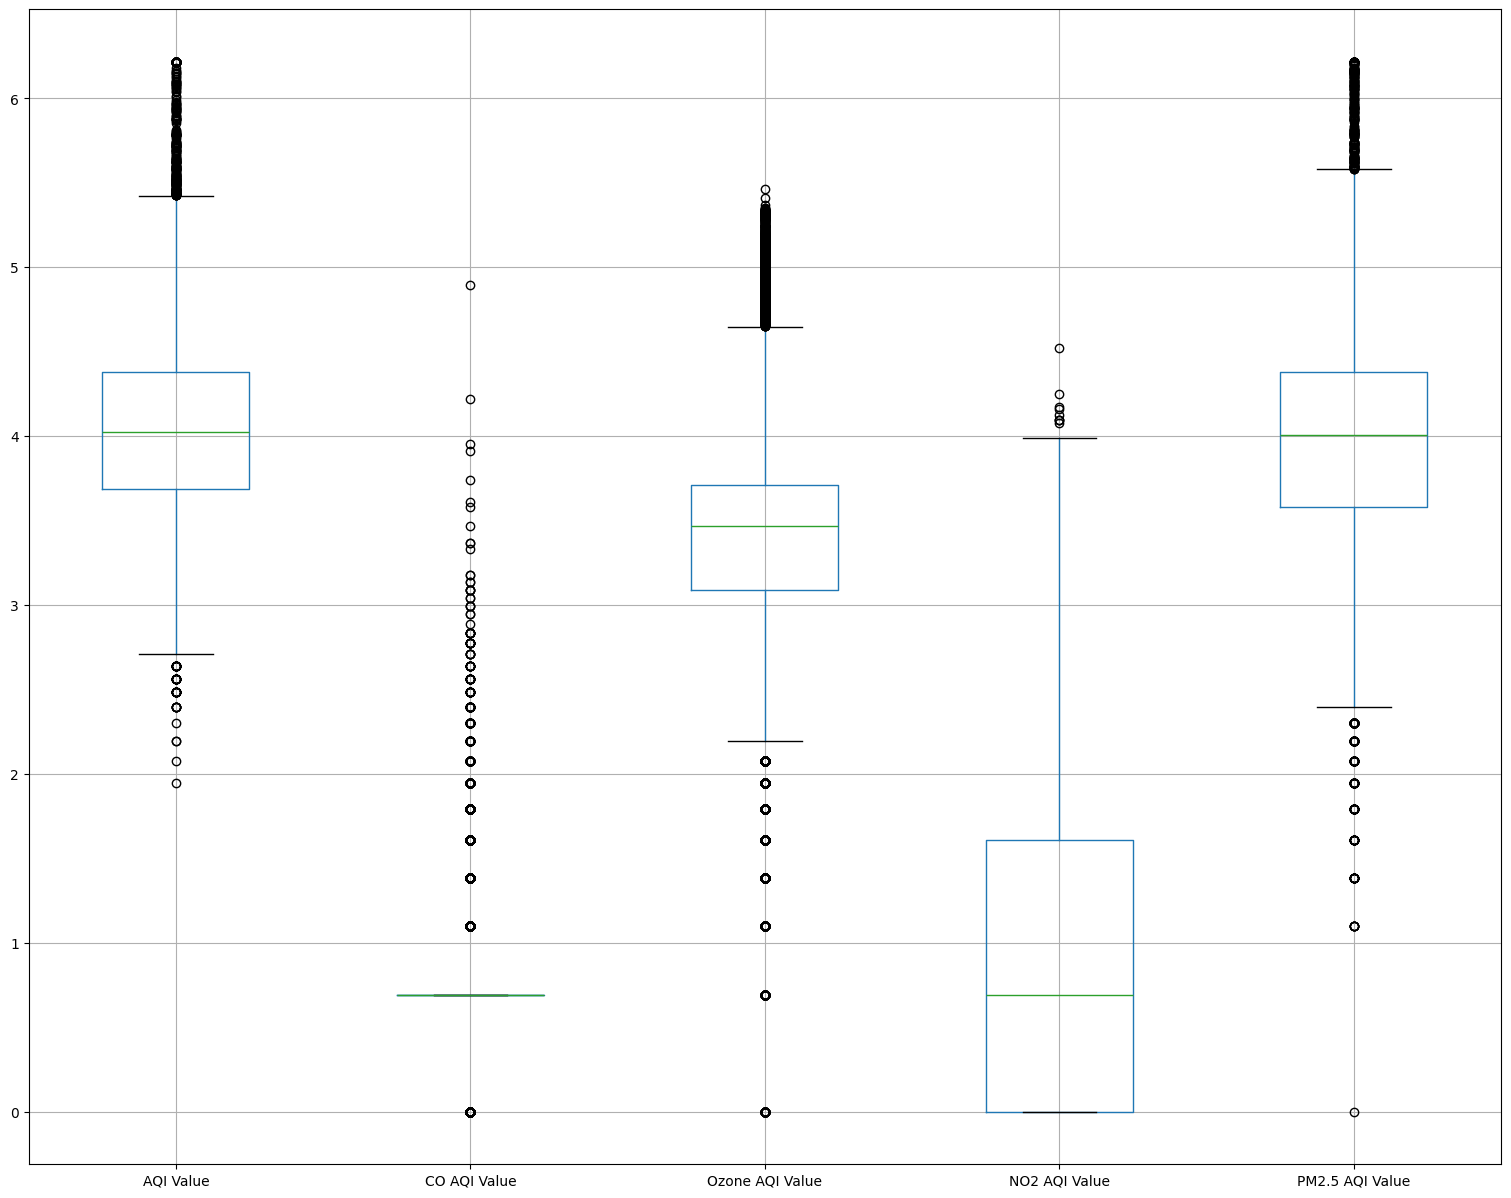

In [ ]:
    # Создаем диаграмму размаха
  df_log.boxplot(figsize=(19, 15))

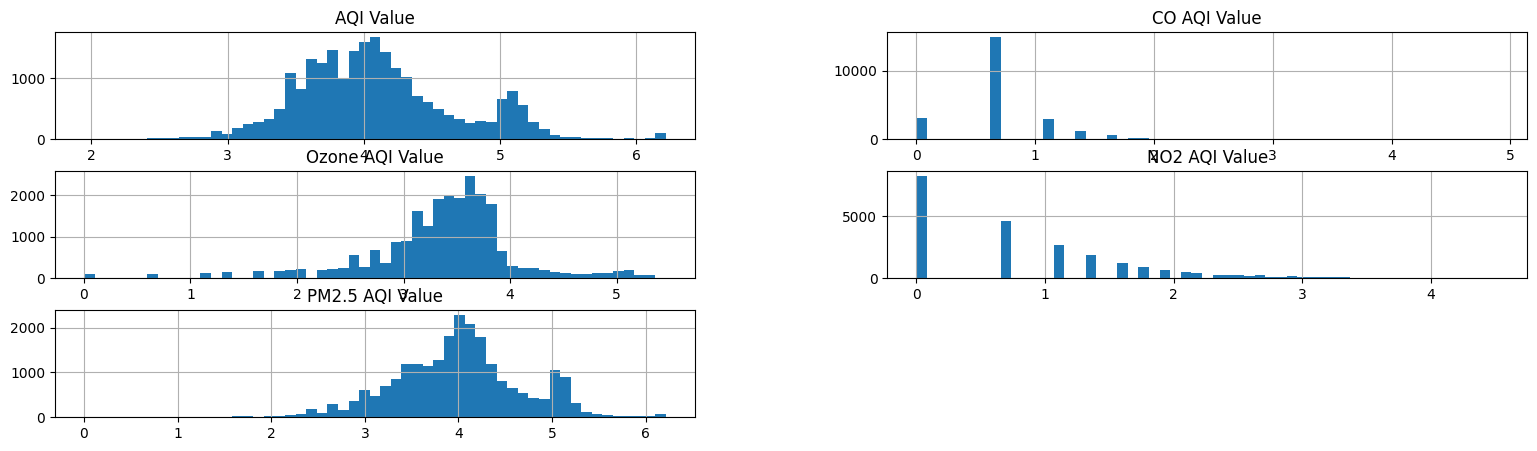

In [ ]:
  # Создаем гистограмму
  df_log.hist(figsize=(19, 5), bins=55)
  plt.show()